In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import skimage
import scipy.misc
from skimage.morphology import flood

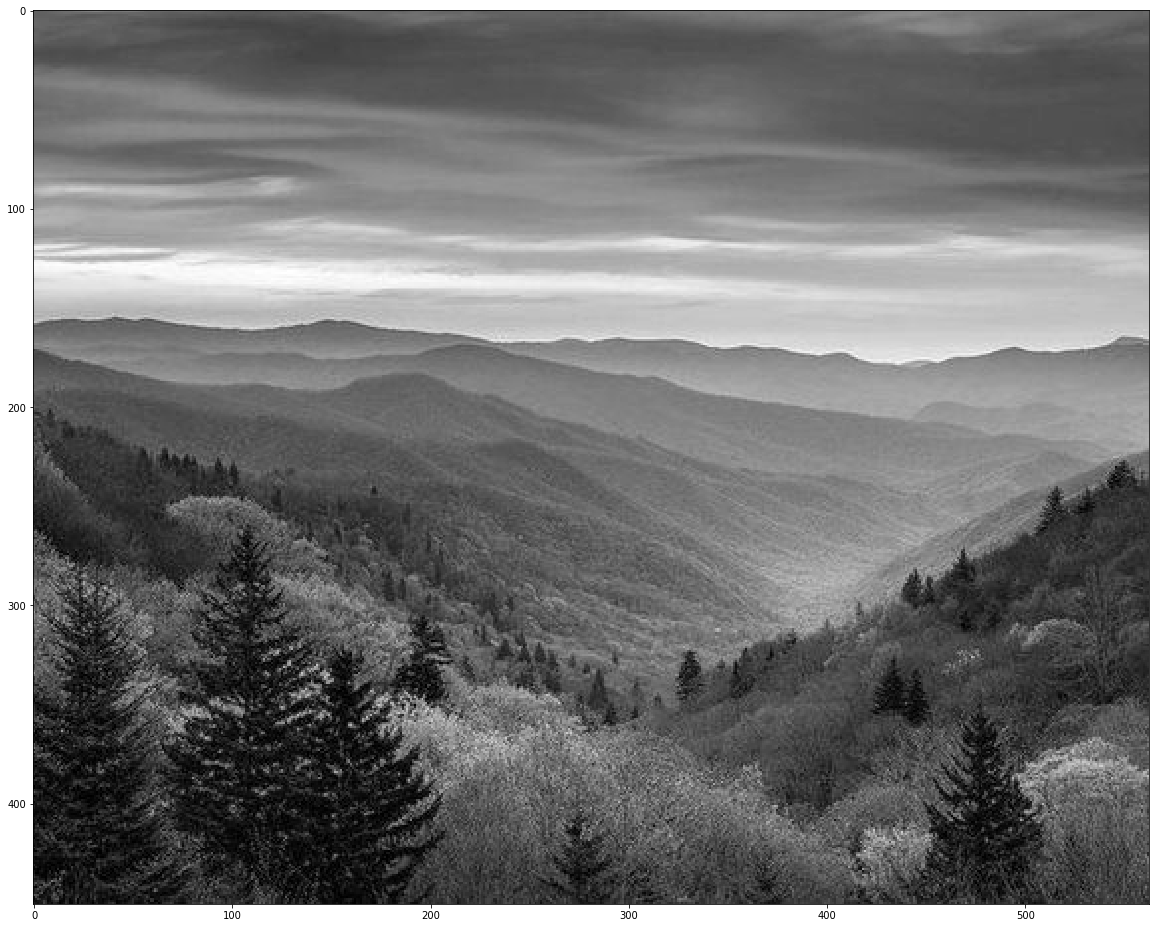

In [2]:
image = cv2.imread("../data/img5.jpg", 0)
plt.figure(figsize=(20,20))
plt.imshow(image, cmap = "gray")

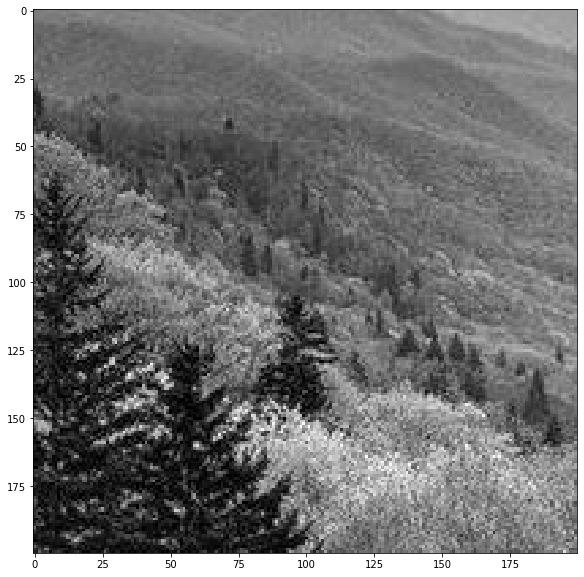

In [3]:
cropped_image = image[200:400, 100:300]
plt.figure(figsize=(10,10))
plt.imshow(cropped_image, cmap = "gray")

In [4]:
# Threshold into number of grey values

def quantize(img, num_grey):
    pil_img = Image.fromarray(cropped_image)
    pil_img = pil_img.quantize(num_grey)
    reduced_image = np.array(pil_img)
    return reduced_image

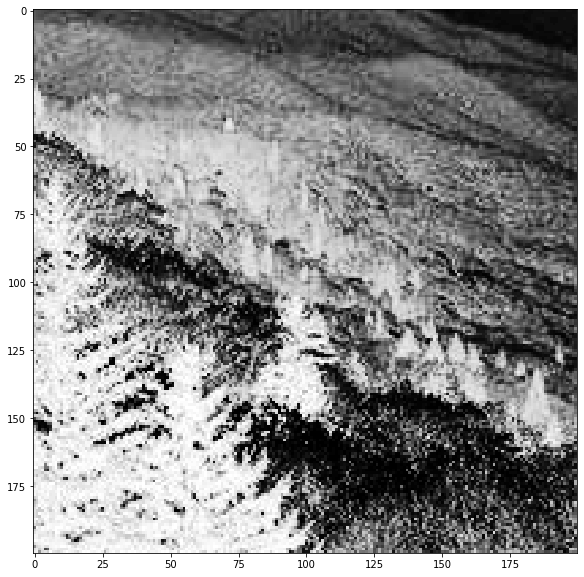

In [5]:
num_grey = 72

reduced_image = quantize(cropped_image, num_grey)

plt.figure(figsize=(10, 10))
plt.imshow(reduced_image, cmap='gray')

In [6]:
# Flood fill

def getFloodMasks(img, tol, conn = 1):
    # tol : tolerance within a flooded segment
    # conn : connectivity, 1 for 4-conn, 2 for 8-conn (defaults to 4-conn)
    
    masks = []
    allmasks = np.zeros_like((img)).astype("bool")
    
    x,y = 0,0

    while allmasks.all() == False:
        mask = flood(img, (x,y), tolerance=tol, connectivity=conn)
        masks.append(mask)
        allmasks = np.logical_or(allmasks, mask)

        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if allmasks[i,j] == False:
                    x,y = i, j
                    break
        
    return masks

In [7]:
masks = getFloodMasks(reduced_image, 20)
print(len(masks))

440


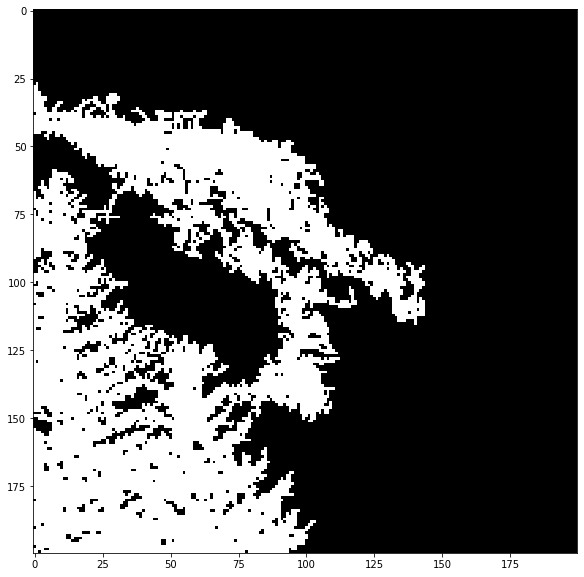

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(masks[1], cmap='gray')

In [9]:
masks_count = []
for mask in masks:
    count = np.count_nonzero(mask)
    masks_count.append(count)

sorted_ind = np.flip(np.argsort(masks_count))
sorted_masks = np.array(masks)[sorted_ind]

In [10]:
np.array(masks_count)[sorted_ind]

array([18503, 18439, 18261, 17864, 17210, 15403, 11714,  3980,  3528,
        2055,   555,   541,   405,   214,   136,   106,    89,    66,
          63,    63,    61,    59,    58,    49,    47,    45,    41,
          41,    34,    32,    28,    26,    26,    24,    23,    22,
          21,    21,    20,    20,    20,    19,    18,    17,    16,
          16,    15,    15,    14,    14,    14,    14,    14,    13,
          13,    13,    12,    12,    12,    12,    12,    12,    11,
          11,    11,    11,    11,    11,    11,    10,    10,    10,
           9,     9,     9,     9,     9,     9,     9,     9,     9,
           9,     8,     8,     8,     8,     8,     8,     8,     7,
           7,     7,     7,     7,     7,     7,     7,     7,     7,
           7,     6,     6,     6,     6,     6,     6,     6,     6,
           6,     6,     6,     6,     6,     6,     5,     5,     5,
           5,     5,     5,     5,     5,     5,     5,     5,     5,
           5,     5,

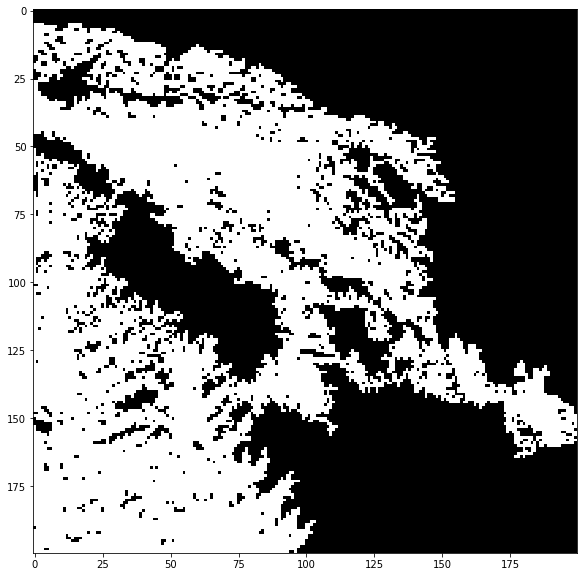

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(sorted_masks[3], cmap='gray') 

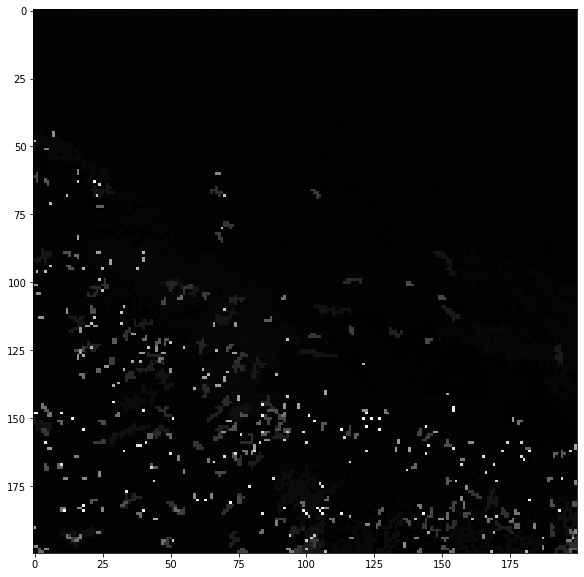

In [15]:
def masksToLabel(masks):
    label = np.zeros_like((masks[0])).astype("uint32")
    for i in range(len(masks)):
        label[masks[i] == True] = i
    return label
    
label = masksToLabel(sorted_masks)
    
plt.figure(figsize=(10, 10))
plt.imshow(label, cmap="gray")

In [13]:
# Find max number of times the masks overlaps

combined = np.zeros_like((masks[0]))
for mask in masks:
    combined = combined + mask.astype("int")

In [14]:
combined.max()

7